In the previous article of the series, we explored the concept of dispersion in data. I mentioned how the standard deviation is a very powerful measure of dispersion when the distribution is similar to the gaussian function. In this exercise I am going to dig into this subject to figure out what this actually means. I also want to discover how we can apply this to real data and machine learning.

### The Gaussian Function (Normal Distribution)

Definition:

$$ g(x) = \frac{1} {\sigma\sqrt{2\pi}} e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}$$

Where $\mu$ is the mean, and $\sigma$ is the standard deviation. We can actually plot this function in python and watch the behavior as we adjust $\mu$ and $\sigma$.

In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns
import pandas as pd
%matplotlib inline

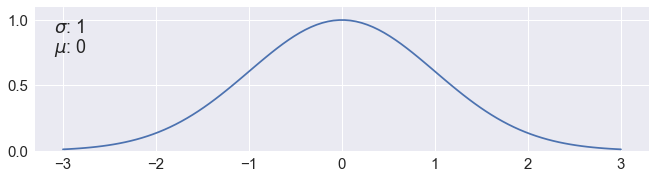

In [2]:
def gaussian(sigma, mu, i):
    x = np.linspace(-3, 3, 100)
    y = 1/(math.sqrt(sigma**math.pi))*np.exp(-1*np.power((x - mu)/sigma, 2)/2)
    
    sns.set(font_scale=1.5)    
    fig = plt.figure(figsize=(11,9))
    ax = fig.add_subplot(3, 1, i)
    ax.plot(x, y)
    ax.annotate(r'$\sigma$: {}'.format(sigma), xy=(-3.1, .9))
    ax.annotate(r'$\mu$: {}'.format(mu), xy=(-3.1, .75))
    ax.set_ylim(bottom = 0, top = 1.1)
    plt.show()
    
gaussian(sigma=1, mu=0, i=1)


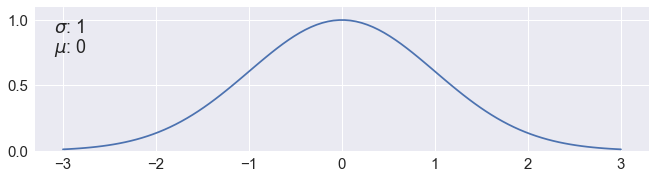

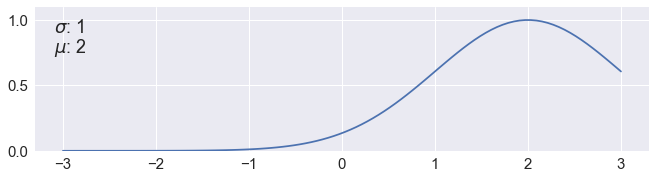

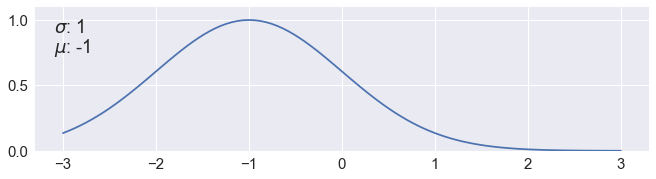

In [3]:
gaussian(sigma=1, mu=0, i=1)
gaussian(sigma=1, mu=2, i=2)
gaussian(sigma=1, mu=-1, i=3)

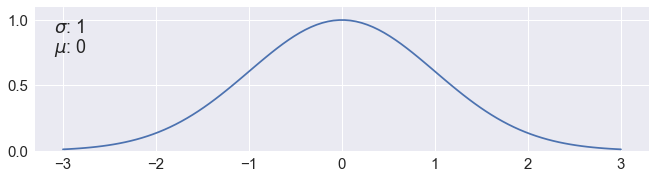

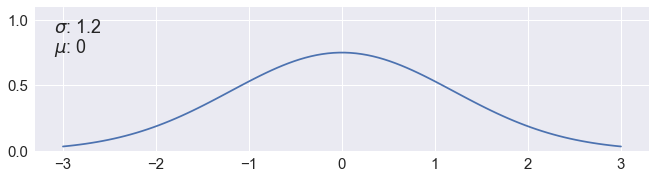

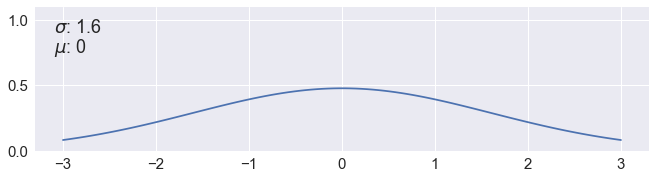

In [4]:
gaussian(sigma=1, mu=0, i=1)
gaussian(sigma=1.2, mu=0, i=2)
gaussian(sigma=1.6, mu=0, i=3)

As we adjusted $\mu$, the curve shifts left and right, and as we adjusted $\sigma$ the curve got flatter and wider. 

Suppose we have a data set with a mean of 2 and a standard deviation of 0.1. The curve would simply shift 2 units right, because the center of the data is now at 2. In addition, this curve will be appear narrow because most of the data is concentrated between 1.9 - 2.1.

Plotting all this out in python:

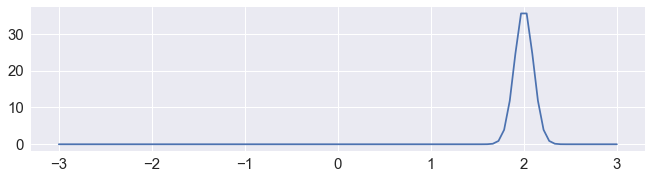

In [5]:
def gaussian_tall(sigma, mu, i):
    x = np.linspace(-3, 3, 100)
    y = 1/(math.sqrt(sigma**math.pi))*np.exp(-1*np.power((x - mu)/sigma, 2)/2)
    sns.set(font_scale=1.5)    
    fig = plt.figure(figsize=(11,9))
    ax = fig.add_subplot(3, 1, i)
    ax.plot(x, y)
    
gaussian_tall(sigma=0.1, mu=2, i=1)

### Calculating The Area Under the Curve

The gaussian function can be used to represent probability density. We can determine the probability that any given data point within a certain standard deviation by calculating the area under the curve.

For example, if we want to know the probability that a data point is within 1 standard deviation, we would take the area between $\mu-\sigma$ and $\mu+\sigma$. We can do this by using the simpsons rule on scipy.

The code I written below calculates the percentage of data within 1, 2, and 3 standard deviations away from the mean for a normal distribution by integrating the area under the curve.

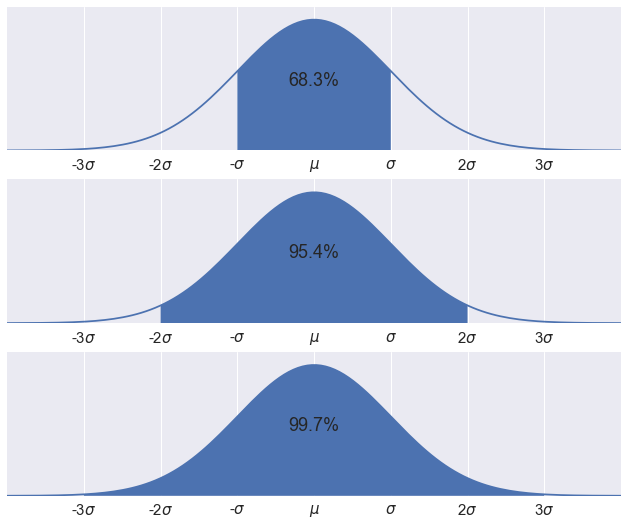

In [6]:
from scipy.integrate import simps

#The Gaussian Function
def g(x):
    return 1/(math.sqrt(1**math.pi))*np.exp(-1*np.power((x - 0)/1, 2)/2)

fig = plt.figure(figsize=(11,9))
x = np.linspace(-300, 300, 10000)

for i in range(1, 4):
    #Draws the gaussian curve
    ax = fig.add_subplot(3, 1, i)
    ax.plot(x, g(x))
    ax.set_ylim(bottom = 0, top = 1.1)
    ax.set_xlim(left = -4, right = 4)
    ax.set_yticks([])
    plt.xticks([-3, -2, -1 , 0, 1, 2, 3], 
               [r'-3$\sigma$', r'-2$\sigma$', r'-$\sigma$' , r'$\mu$', r'$\sigma$', r'2$\sigma$', r'3$\sigma$']
              )
    
    #Fills the area under the curve
    section = np.arange(-i, i, 1/2000)
    ax.fill_between(section, g(section))

    #Calculates the area under the curve using Simpson's Rule
    x_range = np.linspace(-i, i, 2000)
    y_range = g(x_range) 
    area_total = simps(g(x), x)
    area_part = simps(y_range , x_range)
    percent_data = np.round((area_part/area_total)*100, 1)
    ax.annotate('{}%'.format(percent_data), xy=(0, 0.5), ha='center')
    
plt.show()

What I showed above is simply the 68-95-99.7 rule. This is a shorthand to remember the percentage of values that lie within 1, 2, and 3 standard deviations away from the mean. However, we can calculate this value for any standard deviation value $\sigma$ using the area under the curve.

### The Z-Score

Definition:

$$ Z = \frac{x-\mu} {\sigma} $$

Where $\mu$ is the mean, and $\sigma$ is the standard deviation. This formula transform the value $x$ into standard deviation units away from the mean. For example, a z-score of -1.5 would imply that the value $x$ was -1.5 standard deviation away from the mean.

In data science, we can transfrom for every data point in a column into z-scores. This is a feature scaling technique is known as <b>standardization</b>. Standardization transforms the data to have zero mean and unit variance. This technique is useful for machine learning estimators in scikit-learn that assumes all features to be centered around zero and have variance in the same order.

Suppose we are using a the KNN estimator, this algorithm is sensitive to magnitude. If the training data has a feature that has an order of magnitude many times greater than the other features, it can dominate the estimator. As a result, the other features will be undervalued in our final model. For more information on this click [here](http://scikit-learn.org/stable/modules/preprocessing.html).


### Detecting Outliers Using the Z-Score

The Z-Score is also very useful for detecting outliers during the data exploration step. We are going to use 'imports-85.data' and perform a little bit of data cleaning on the 'peak-rpm' column. 

In [7]:
colnames = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

data = pd.read_csv("imports-85.data", names=colnames)


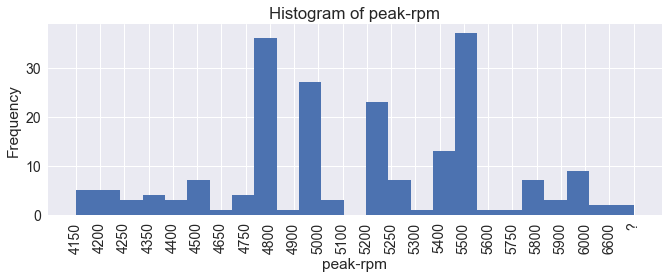

In [17]:
sns.set(font_scale=1.4)    
fig=plt.figure(figsize=(11,3.5))
data['peak-rpm'].hist(bins=25)
plt.title('Histogram of peak-rpm')
plt.xticks(rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('peak-rpm')
plt.show()

From this histogram, we can't really tell if we have outliers. First, let's clean up this column a bit by removing missing values. Then we can standardize the column and plot the histogram.

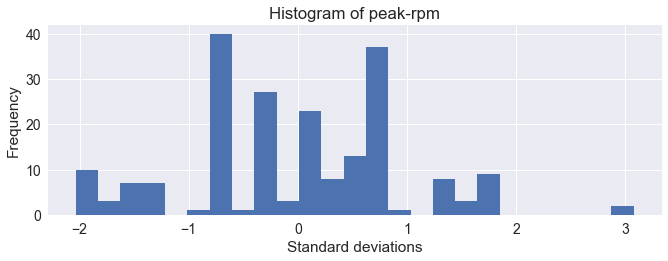

In [18]:
peak_rpm_cleaned = data['peak-rpm'].replace("?", np.nan).dropna().astype("float")
standardized_peak_rpm = (peak_rpm_cleaned-peak_rpm_cleaned.mean())/(peak_rpm_cleaned.std())
fig=plt.figure(figsize=(11,3.5))
standardized_peak_rpm.hist(bins=25)
plt.title('Histogram of peak-rpm')
plt.ylabel('Frequency')
plt.xlabel('Standard deviations')
plt.show()

This histogram is more clear in standard deviation units. We notice a small bar of outliers at 3 standard deviations. As a rule of thumb, we can remove data points that are 3 or more standard deviations away. 

Note: If we do decide to remove this cluster of outliers, we would have to standardize our data after removal. We can do this during the feature engineering step. This can be easily done using boolean filtering.

The code below removes any data with higher than 3 standard deviations and plots the resulting standardized histogram.

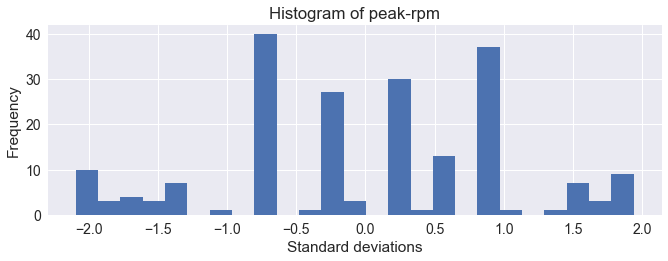

In [19]:
fig=plt.figure(figsize=(11,3.5))
peak_rpm_cleaned2 = peak_rpm_cleaned[standardized_peak_rpm < 3]
new_standardized_peak_rpm = (peak_rpm_cleaned2-peak_rpm_cleaned2.mean())/(peak_rpm_cleaned2.std())
new_standardized_peak_rpm.hist(bins=25)
plt.title('Histogram of peak-rpm')
plt.ylabel('Frequency')
plt.xlabel('Standard deviations')
plt.show()

### The Central Limit Theorem

So we just detected some outliers using the z-score, but why are we allowed to do that? The distribution did not even resemble the normal distribution. This is where the central limit theorem comes in.

The central limit theorem states that if you have a sufficient number of randomly selected samples, the means of those samples will follow a normal distribution. As a result, we can apply statistical techniques that assume normality even if the samples themselves do not appear to be normal.

Let's take the original peak-rpm data again without removing the outlier. This is what we are going to do:

1. Randomly sample $n$ number of data points, calculate the mean.

2. Assign the mean to a new series.

3. Repeat the first two steps 1000 times.

3. Plot the resulting histogram.


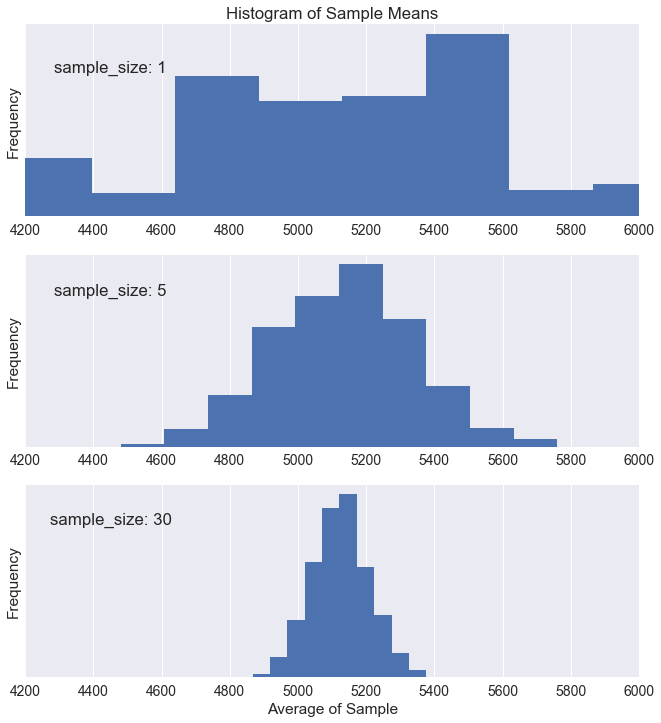

In [23]:
def sampler(n_samples=1000, sample_size=10):
    average_peak_rpm = []
    for i in range(n_samples):
        sample = peak_rpm_cleaned.sample(sample_size)
        average_peak_rpm.append(sample.mean())
    return pd.Series(average_peak_rpm)

fig=plt.figure(figsize=(11,12))
np.random.seed(100)
sample_size = [0, 1,5,30]
for i in range(1, 4):
    average_peak_rpm = sampler(1000, sample_size[i])
    ax = fig.add_subplot(3, 1, i)
    ax = average_peak_rpm.hist()
    ax.set_xlim(left = 4200, right = 6000)
    ax.set_ylabel('Frequency')
    ax.set_yticks([])
    if i == 1:
        plt.title('Histogram of Sample Means')
    ax.annotate('sample_size: {}'.format(sample_size[i]), xy=(4450, 200), ha='center', va='bottom')

plt.xlabel('Average of Sample')
plt.show()

We can see the histograms slowly takes the shape of a normal distribution as we increase the sample size.

In summary, we know that the sampling distribution of the mean is normally distributed as long as the sample size, $n$ is large enough. The central limit theorem enables us to use very powerful statistical tools to analyze data. In fact, the majority of inferential statistics rely upon the assumption of normality. We'll dig into more of these statistical tools in the next article of the series.